# Affinity Propagation

根據每個點互相傳送消息建立的分群。


下面是使用範例



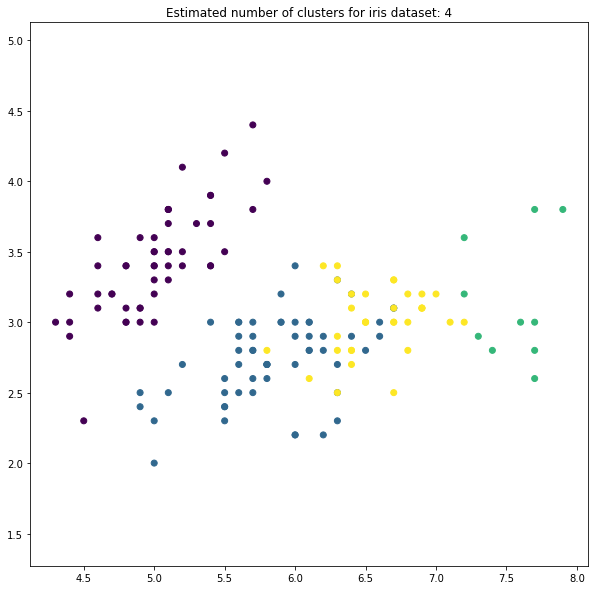

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn.decomposition import PCA


X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)

# Affinity Propagation method
model = AffinityPropagation(damping=0.96).fit(X_pca)
labels = model.labels_
cluster_centers = model.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis("equal")
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()


# Mean Shift

根據 核密度估計（kernel density estimation） 來做的分群方法。

下面是使用範例


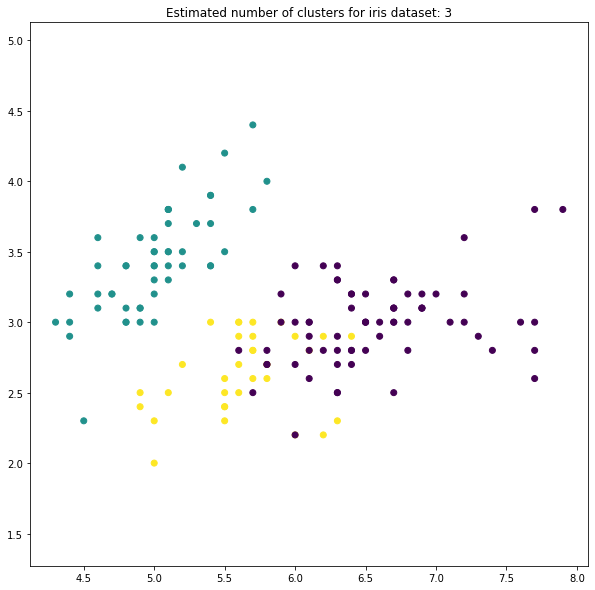

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import datasets
from sklearn.decomposition import PCA


X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)


#estimate bandwidth
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

#Mean Shift method
model = MeanShift(bandwidth = bandwidth, bin_seeding = True).fit(X_pca)
labels = model.labels_
cluster_centers = model.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis("equal")
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()




# Spectral clustering

根據圖論的方法去建立分群，下面是使用範例。



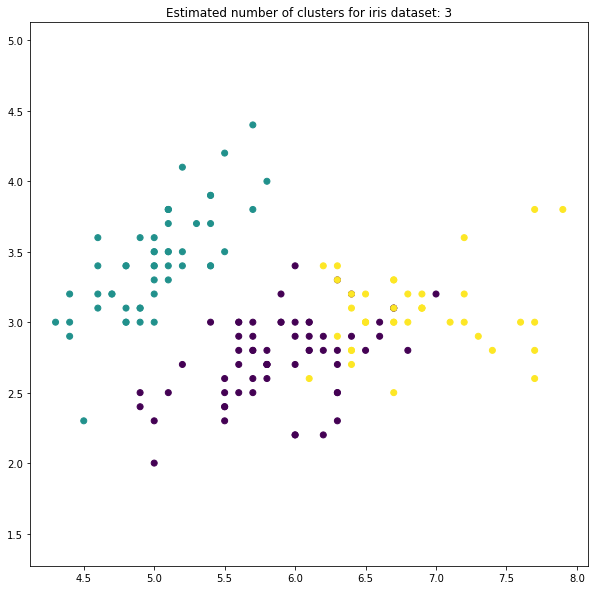

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.decomposition import PCA

X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)

# Spectral Clustering method
model = SpectralClustering(n_clusters = 3, assign_labels = 'discretize').fit(X_pca)
labels = model.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis("equal")
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()


# Hierarchical clustering

![example](../../../images/sphx_glr_plot_linkage_comparison_001.png)

下面是使用範例





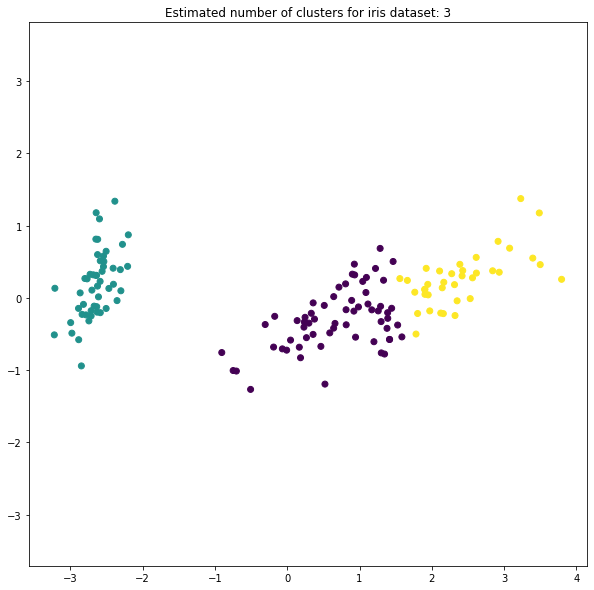

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.decomposition import PCA


X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)

# AgglomerativeClustering
#linkage: ['ward', 'complete', 'average']
model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(X_pca)
labels = model.labels_

n_clusters_ = len(set(labels))

# plot
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.axis('equal')
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()


# DBSCAN

基於密度的分群方法，
他的核心思想是如果我們是同一群必定有許多相似之處，
他把每個點分成三類，

* 核心點（core points）: 風雲人物
* 邊界點（border points）: 邊緣人
* 雜訊（Noise）: 孤狼

用這種根據資料自己的分布密度就可以把資料自己分群，下面給使用範例。

[參考](https://medium.com/ai-academy-taiwan/clustering-method-1-11bcbe0fb12f)



Noise points : 40


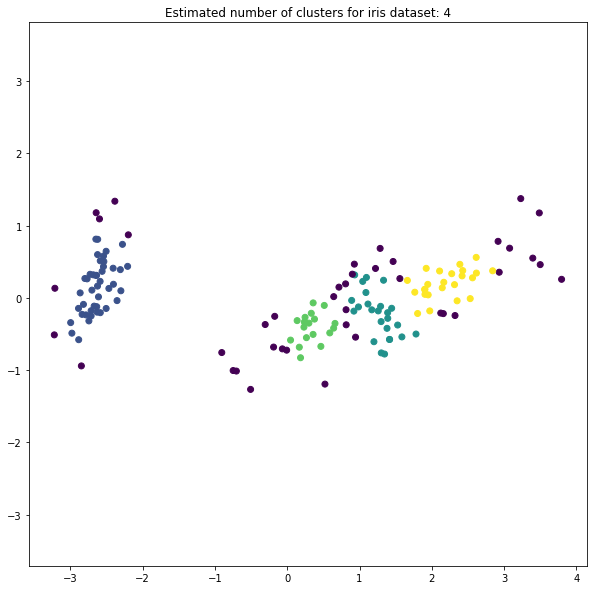

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.decomposition import PCA


X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)

# DBSCAN 
model = DBSCAN(eps=0.3, min_samples=10).fit(X_pca)
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Noise points : %s' % (n_noise_))

# plot
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.axis('equal')
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()



# OPTICS

也是根據密度的分群方法


下面是使用範例。



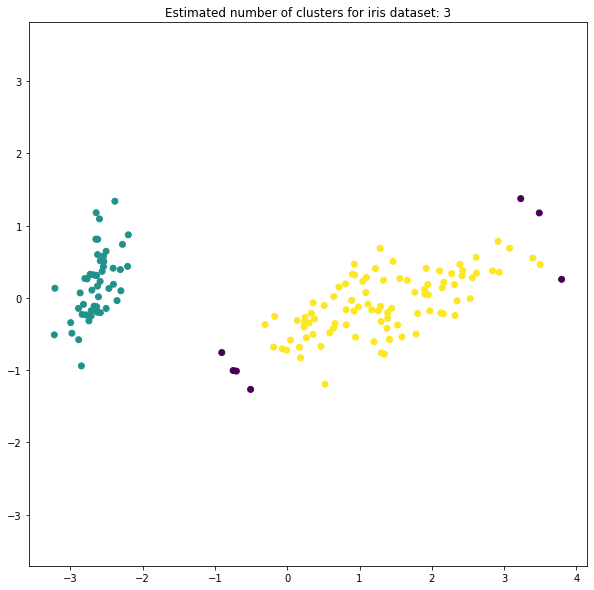

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn import datasets
from sklearn.decomposition import PCA


X, y = datasets.load_iris(return_X_y=True)
X_pca = PCA(n_components=2).fit_transform(X)

# OPTICS
model = OPTICS(min_samples=5, eps=0.5, cluster_method='dbscan').fit(X_pca)
labels = model.fit_predict(X_pca)

# Number of clusters in labels
n_clusters_ = len(set(labels))

# plot
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.axis('equal')
plt.title("Estimated number of clusters for iris dataset: %d" % n_clusters_)
plt.show()


更多詳細的內容可以[參考](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)。